# $\Lambda_b$ Reconstruction 

### Task

* Using the new data files, construct a histogram of the mass of the lambda_b by adding the four vectors of the pion, kaon, proton, muon, neutrino (stored as electrons in the code) 
    * This should have a peak 
* Construct a histogram of the mass of the lambda_b by adding the four vectors of the pion kaon, proton, and muon 
    * This should be a blob
* Take the events where J/Psi candidate is between 3.0 - 3.2 GeV and plot the lambda_b candidate using the proton, kaon, pion, and muon (no neutrino)
* Write a python function that takes in two vectors (as 3-element lists) and returns the angle between them
* Using the angle_between_2_vectors function, find the angle between the lambda_b and the neutrino and plot cos(theta)
    * Use momentum vectors


Actual Decay
$$\Lambda_b^0 \rightarrow \pi^+ + K^- + p + \mu^- + \nu$$ 

Fake Decay
$$\Lambda_b^0 \rightarrow J/\psi  K^-  p$$

* $J/\psi$ is fake because it's a pion and a muon rather than two muons

$\Lambda_b^0$ - is a hadron, but more specifically a baryon
* Mass = 5.620 GeV
* Composition = up + down + bottom quark
* Decays into a pion, kaon, proton, muon, and neutrino

$\pi^+$ is a pion or pi meson
* Made up of an up and anti-down quark
* Mass = 0.1395 GeV
* Pions are the lightest mesons, composed of the lightest quarks (up and down)
* Mean lifetime is 26 nanoseconds
* Charged pions most often decay into muons and muon neutrinos, and neutral pions into gamma rays

$K^-$ is the anti-particle of the Kaon or K Meson
* Mass = 0.494 GeV
* Composition = anti-up + strange quark

$p$ is a hadron, but more specifically a baryon composed of three quarks
* Mass = 0.93827 GeV
* Composition = 2 up + 1 down quark

$\mu^-$ is an unstable subatomic particle, classified as a lepton
* Mass = 0.105658 GeV
* Muon decay always produces at least three particles, which must include an electron of the same charge as the muon and two neutrinos of different types
* The muon is not believed to have any sub-structure (composed of any simpler particles) like that of all leptons

$\nu$ is a lepton
* Mass = $3.20 x 10^-10 GeV$
* Composition = elementary particle
* They are the only identified candidate for dark matter, specifically hot dark matter
* The majority of neutrinos in the vicinity of the Earth are from nuclear reactions in the Sun.
* Neutrinos come in three flavors:
    * $\nu_e$ - electron neutrinos
    * $\nu_\mu$ - muon neutrino
    * $\nu_\tau$ - tau neutrinos

This is the $\Lambda_b^0$ decay that we are looking at (neglecting the neutrino): $$\Lambda_b^0 \rightarrow p + \pi^+ + K^- + \mu^-$$

These are possible mis-identifications that could have led to the $J/\psi$ resonances observed

$$\Lambda_b^0 \rightarrow p + \mu^+ + K^- + \mu^-$$
$$\Lambda_b^0 \rightarrow p + \mu^+ + \mu^- + K^-$$
$$\Lambda_b^0 \rightarrow \mu^+ + p + K^- + \mu^-$$
$$\Lambda_b^0 \rightarrow \mu^+ + p + \mu^- + K^-$$

In [2]:
import lhcb_tools as lhcb
import lichen.lichen as lch
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

# Comment this next line if you want the autoscroll back. 
%load_ext disable_autoscroll

/Applications/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>

autoscrolling long output is disabled


In [45]:
import math
from math import sqrt
def mass(p4):
    E,px,py,pz = p4[0:4]
    m1 = (E**2-(px**2+py**2+pz**2))
    if m1>=0:
        return sqrt(m1)
    else:
        return sqrt(-m1)

def add_4_vecs(p4s):
    E,px,py,pz = (0,0,0,0)

    for p4 in p4s:
        E += p4[0]
        px += p4[1]
        py += p4[2]
        pz += p4[3]

    p4tot = [E,px,py,pz]    
    return p4tot

def redefine_4vec(p4, newmass):
    px = p4[1]
    py = p4[2]
    pz = p4[3]
    newE = np.sqrt(newmass*newmass + px*px + py*py + pz*pz)
    return [newE,px,py,pz]

def angle_between_2_vectors(a,b):
    angle = 0
    dot_product = a[0]*b[0]+a[1]*b[1]+a[2]*b[2]
    a_mag = sqrt(a[0]*a[0]+a[1]*a[1]+a[2]*a[2])
    b_mag = sqrt(b[0]*b[0]+b[1]*b[1]+b[2]*b[2])
    mag = a_mag * b_mag
    theta = math.acos(dot_product/mag)
    return theta

x = [1,0,0] 
y = [0,0,1] 
angle = angle_between_2_vectors(x,y) 
print angle

1.57079632679


In [44]:
#infile = open("ToyMC_LHCb_BtoLambdacmunu.dat",'r')
#infile = open('ToyMC_LHCb_BtoLambdacmunu_5MeV_resolution.dat')
#infile = open('ToyMC_LHCb_BtoLambdacmunu_5MeV_resolution_100k.dat')
infile = open('ToyMC_LHCb_BtoLambdacmunu_0.5pct_resolution_100k.dat')
#infile = open('ToyMC_LHCb_BtoLambdacmunu_0.5pct_resolution_1M.dat')


npions = []
nkaons = []
nprotons = []
nmuons = []
nneutrinos = []

pion_mass = []
kaon_mass = []
proton_mass = []
muon_mass = []
neutrino_mass = [] # Neutrinos are stored as electrons (charge = 0)
lambda_b_mass1 = []
lambda_b_mass2 = []
lambda_c_mass = []
jpsi_mass1 = [] # This is not real
jpsi_mass2 = []
jpsi_mass3 = []
jpsi_mass4 = []
pq_mass1 = []
pq_mass2 = []
pq_mass3 = []
pq_mass4 = []

fake_lambda_b_mass1 = [] 
fake_lambda_b_mass2 = [] 
fake_lambda_b_mass3 = [] 
fake_lambda_b_mass4 = [] 

angles0 = []
angles1 = []
angles2 = []
angles3 = []
angles4 = []

collisions = lhcb.get_collisions(infile,False)
print len(collisions)

for collision in collisions:
    
    pions,kaons,protons,muons,neutrinos,photons = collision
    
    npions.append(len(pions))
    nkaons.append(len(kaons))
    nprotons.append(len(protons))
    nmuons.append(len(muons))
    nneutrinos.append(len(neutrinos))
    
    pion_p4 = pions[0][0:4]
    mpion = mass(pion_p4)
    pion_mass.append(mpion)
        
    kaon_p4 = kaons[0][0:4]
    mkaon = mass(kaon_p4)
    kaon_mass.append(mkaon)
            
    proton_p4 = protons[0][0:4]
    mproton = mass(proton_p4)
    proton_mass.append(mproton)
                
    muon_p4 = muons[0][0:4]
    mmuon = mass(muon_p4)
    muon_mass.append(mmuon)

    nu_p4 = neutrinos[0][0:4]
    mneutrino = mass(nu_p4)
    neutrino_mass.append(mneutrino)

    lbp4_1 = add_4_vecs([pion_p4, kaon_p4, proton_p4, muon_p4, nu_p4])
    lbp4_2 = add_4_vecs([pion_p4, kaon_p4, proton_p4, muon_p4])
    lc = add_4_vecs([pion_p4, kaon_p4, proton_p4])

    fake_muon1 = redefine_4vec(pion_p4, 0.105)
    fake_muon2 = redefine_4vec(kaon_p4, 0.105)
    fake_muon3 = redefine_4vec(proton_p4, 0.105)
    fake_kaon = redefine_4vec(muon_p4, 0.494)
    fake_proton = redefine_4vec(pion_p4, 0.938)

    jpsi1 = add_4_vecs([fake_muon1,muon_p4]) # Fake!
    jpsi2 = add_4_vecs([fake_muon1,fake_muon2])
    jpsi3 = add_4_vecs([fake_muon3,muon_p4])
    jpsi4 = add_4_vecs([fake_muon3,fake_muon2])

    mlambda_b1 = mass(lbp4_1)
    mlambda_b2 = mass(lbp4_2)
    mlambda_c = mass(lc)
    mjpsi1 = mass(jpsi1) # Fake!
    mjpsi2 = mass(jpsi2)
    mjpsi3 = mass(jpsi3)
    mjpsi4 = mass(jpsi4)

    lambda_b_mass1.append(mlambda_b1)   
    lambda_b_mass2.append(mlambda_b2)
    lambda_c_mass.append(mlambda_c)
    
    jpsi_mass1.append(mjpsi1)
    jpsi_mass2.append(mjpsi2)
    jpsi_mass3.append(mjpsi3)
    jpsi_mass4.append(mjpsi4)

    jpsi_window = 0.048 # Select jpsis that are +/- this value
    #jpsi_window = 1.0

#     if mjpsi>3.096-jpsi_window and mjpsi<3.096+jpsi_window and angle>0.998:
#         jpsi = redefine_4vec(jpsi, 3.096)
#         #print mass(jpsi)
        
#         fake_lbp4 = add_4_vecs([jpsi,proton_p4,kaon_p4])
#         fakemlambda_b = mass(fake_lbp4)
#         fake_lambda_b_mass.append(fakemlambda_b)

#         if fakemlambda_b>5.6 and fakemlambda_b<5.65:
#             pq_p4 = add_4_vecs([jpsi,proton_p4])
#             pq_mass.append(mass(pq_p4))
            
    fake_jpsi1 = redefine_4vec(jpsi1, 3.096)
    fake_jpsi2 = redefine_4vec(jpsi2, 3.096)
    fake_jpsi3 = redefine_4vec(jpsi3, 3.096)
    fake_jpsi4 = redefine_4vec(jpsi4, 3.096)
    #print mass(jpsi)

    fake_lbp41 = add_4_vecs([fake_jpsi1,proton_p4,kaon_p4])
    fakemlambda_b1 = mass(fake_lbp41)
    #print fakemlambda_b1
    fake_lambda_b_mass1.append(fakemlambda_b1)
    
    fake_lbp42 = add_4_vecs([fake_jpsi2,proton_p4,fake_kaon])
    fakemlambda_b2 = mass(fake_lbp42)
    fake_lambda_b_mass2.append(fakemlambda_b2)
    
    fake_lbp43 = add_4_vecs([fake_jpsi3,fake_proton,kaon_p4])
    fakemlambda_b3 = mass(fake_lbp43)
    fake_lambda_b_mass3.append(fakemlambda_b3)
    
    fake_lbp44 = add_4_vecs([fake_jpsi4,fake_proton,fake_kaon])
    fakemlambda_b4 = mass(fake_lbp44)
    fake_lambda_b_mass4.append(fakemlambda_b4)

    pq_p41 = add_4_vecs([fake_jpsi1,proton_p4])
    pq_mass1.append(mass(pq_p41))
    
    pq_p42 = add_4_vecs([fake_jpsi2,proton_p4])
    pq_mass2.append(mass(pq_p42))
    
    pq_p43 = add_4_vecs([fake_jpsi3,fake_proton])
    pq_mass3.append(mass(pq_p43))
    
    pq_p44 = add_4_vecs([fake_jpsi4,fake_proton])
    pq_mass4.append(mass(pq_p44))
    
    theta0 = angle_between_2_vectors(lbp4_1[1:4],nu_p4[1:4])
    angle0 = math.cos(theta0)
    angles0.append(angle0)
    
    theta1 = angle_between_2_vectors(fake_lbp41[1:4],nu_p4[1:4])
    angle1 = math.cos(theta1)
    angles1.append(angle1)
    
    theta2 = angle_between_2_vectors(fake_lbp42[1:4],nu_p4[1:4])
    angle2 = math.cos(theta2)
    angles2.append(angle2)
    
    theta3 = angle_between_2_vectors(fake_lbp43[1:4],nu_p4[1:4])
    angle3 = math.cos(theta3)
    angles3.append(angle3)
    
    theta4 = angle_between_2_vectors(fake_lbp44[1:4],nu_p4[1:4])
    angle4 = math.cos(theta4)
    angles4.append(angle4)
    

    
print "Processed data!"

# Turn some of these lists into arrays for easier selection cuts. 
jpsi_mass1 = np.array(jpsi_mass1)
fake_lambda_b_mass1 = np.array(fake_lambda_b_mass1)
pq_mass1 = np.array(pq_mass1)

jpsi_mass2 = np.array(jpsi_mass2)
fake_lambda_b_mass2 = np.array(fake_lambda_b_mass2)
pq_mass2 = np.array(pq_mass2)

jpsi_mass3 = np.array(jpsi_mass3)
fake_lambda_b_mass3 = np.array(fake_lambda_b_mass3)
pq_mass3 = np.array(pq_mass3)

jpsi_mass4 = np.array(jpsi_mass4)
fake_lambda_b_mass4 = np.array(fake_lambda_b_mass4)
pq_mass4 = np.array(pq_mass4)

angles0 = np.array(angles0)
angles1 = np.array(angles1)
angles2 = np.array(angles2)
angles3 = np.array(angles3)
angles4 = np.array(angles4)


99987
Processed data!


<IPython.core.display.Javascript object>


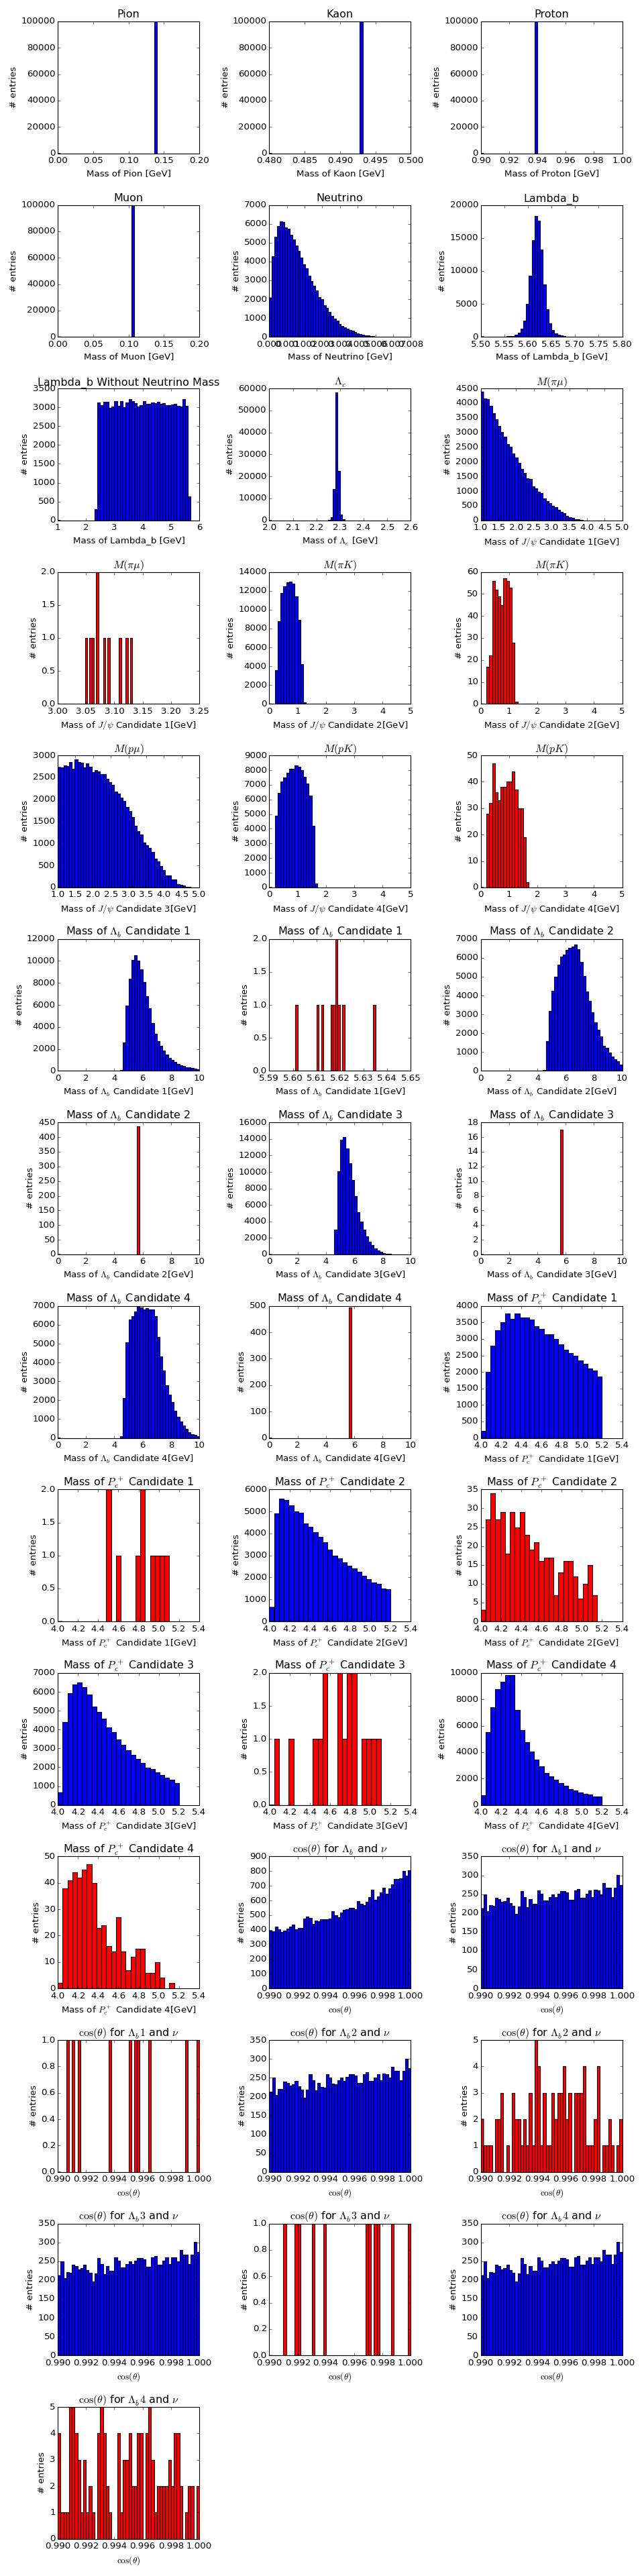

In [58]:
plt.figure(figsize=(12,48))
plt.subplot(14,3,1)
plt.hist(pion_mass,bins=50,range=(0,0.2))
plt.xlabel('Mass of Pion [GeV]')
plt.ylabel('# entries')
plt.title('Pion')  

plt.subplot(14,3,2)
plt.hist(kaon_mass,bins=50,range=(0.48,0.5))
plt.xlabel('Mass of Kaon [GeV]')
plt.ylabel('# entries')
plt.title('Kaon')

plt.subplot(14,3,3)
plt.hist(proton_mass,bins=50,range=(0.9,1))
plt.xlabel('Mass of Proton [GeV]')
plt.ylabel('# entries')
plt.title('Proton') 

plt.subplot(14,3,4)
plt.hist(muon_mass,bins=50,range=(0,0.2))
plt.xlabel('Mass of Muon [GeV]')
plt.ylabel('# entries')
plt.title('Muon')

plt.subplot(14,3,5)
plt.hist(neutrino_mass,bins=50)
plt.xlabel('Mass of Neutrino [GeV]')
plt.ylabel('# entries')
plt.title('Neutrino') 

plt.subplot(14,3,6)
plt.hist(lambda_b_mass1,bins=50,range=(5.5,5.8))
plt.xlabel('Mass of Lambda_b [GeV]')
plt.ylabel('# entries')
plt.title('Lambda_b') 

plt.subplot(14,3,7)
plt.hist(lambda_b_mass2,bins=50,range=(1,6))
plt.xlabel('Mass of Lambda_b [GeV]')
plt.ylabel('# entries')
plt.title('Lambda_b Without Neutrino Mass')

plt.subplot(14,3,8)
plt.hist(lambda_c_mass,bins=50,range=(2,2.5))
plt.xlabel(r'Mass of $\Lambda_c$ [GeV]')
plt.ylabel('# entries')
plt.title(r'$\Lambda_c$')

#######################################################
# Here is where we are making selections
#######################################################

jpsi_window = 0.048 # Select jpsis that are +/- this value
#jpsi_window = 1.0

index1 = np.ones(len(jpsi_mass1),dtype=bool)
index11  = jpsi_mass1>3.096-jpsi_window
index11 *= jpsi_mass1<3.096+jpsi_window
index11 *= fake_lambda_b_mass1>5.6
index11 *= fake_lambda_b_mass1<5.65
index11 *= angles>0.99

index2 = np.ones(len(jpsi_mass2),dtype=bool)
index22  = jpsi_mass2>3.096-jpsi_window
index22 *= jpsi_mass2<3.096+jpsi_window
index22 *= fake_lambda_b_mass2>5.6
index22 *= fake_lambda_b_mass2<5.65
index22 *= angles>0.99
if any(index22) == False:
    index22 = jpsi_mass2<3.096
    index22 *= fake_lambda_b_mass2>5.6
    index22 *= fake_lambda_b_mass2<5.65
    index22 *= angles>0.99
    
index3 = np.ones(len(jpsi_mass3),dtype=bool)
index33  = jpsi_mass3>3.096-jpsi_window
index33 *= jpsi_mass3<3.096+jpsi_window
index33 *= fake_lambda_b_mass3>5.6
index33 *= fake_lambda_b_mass3<5.65
index33 *= angles>0.99

index4 = np.ones(len(jpsi_mass4),dtype=bool)
index44  = jpsi_mass4>3.096-jpsi_window
index44 *= jpsi_mass4<3.096+jpsi_window
index44 *= fake_lambda_b_mass4>5.6
index44 *= fake_lambda_b_mass4<5.65
index44 *= angles>0.99
if any(index44) == False:
    index44 = jpsi_mass4<3.096
    index44 *= fake_lambda_b_mass4>5.6
    index44 *= fake_lambda_b_mass4<5.65
    index44 *= angles>0.99

plt.subplot(14,3,9)
plt.hist(jpsi_mass1,bins=50,range=(1,5))
plt.xlabel(r'Mass of $J/\psi$ Candidate 1[GeV]')
plt.ylabel('# entries')
plt.title(r'$M(\pi \mu)$')

plt.subplot(14,3,10)
plt.hist(jpsi_mass1[index11],bins=50,range=(3,3.2),color='red')
plt.xlabel(r'Mass of $J/\psi$ Candidate 1[GeV]')
plt.ylabel('# entries')
plt.title(r'$M(\pi \mu)$')

plt.subplot(14,3,11)
plt.hist(jpsi_mass2,bins=50,range=(0,5))
plt.xlabel(r'Mass of $J/\psi$ Candidate 2[GeV]')
plt.ylabel('# entries')
plt.title(r'$M(\pi K)$')

plt.subplot(14,3,12)
plt.hist(jpsi_mass2[index22],bins=50,range=(0,5),color='red')
plt.xlabel(r'Mass of $J/\psi$ Candidate 2[GeV]')
plt.ylabel('# entries')
plt.title(r'$M(\pi K)$')

plt.subplot(14,3,13)
plt.hist(jpsi_mass3,bins=50,range=(1,5))
plt.xlabel(r'Mass of $J/\psi$ Candidate 3[GeV]')
plt.ylabel('# entries')
plt.title(r'$M(p \mu)$')

plt.subplot(14,3,13)
plt.hist(jpsi_mass3[index33],bins=50,range=(1,5),color='red')
plt.xlabel(r'Mass of $J/\psi$ Candidate 3[GeV]')
plt.ylabel('# entries')
plt.title(r'$M(p \mu)$')

plt.subplot(14,3,14)
plt.hist(jpsi_mass4,bins=50,range=(0,5))
plt.xlabel(r'Mass of $J/\psi$ Candidate 4[GeV]')
plt.ylabel('# entries')
plt.title(r'$M(p K)$')

plt.subplot(14,3,15)
plt.hist(jpsi_mass4[index44],bins=50,range=(0,5),color='red')
plt.xlabel(r'Mass of $J/\psi$ Candidate 4[GeV]')
plt.ylabel('# entries')
plt.title(r'$M(p K)$')

plt.subplot(14,3,16)
plt.hist(fake_lambda_b_mass1[index1],bins=50,range=(0,10))
plt.xlabel(r'Mass of $\Lambda_b$ Candidate 1[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $\Lambda_b$ Candidate 1')

plt.subplot(14,3,17)
plt.hist(fake_lambda_b_mass1[index11],bins=50,range=(5.6,5.65),color='red')
plt.xlabel(r'Mass of $\Lambda_b$ Candidate 1[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $\Lambda_b$ Candidate 1')

plt.subplot(14,3,18)
plt.hist(fake_lambda_b_mass2[index2],bins=50,range=(0,10))
plt.xlabel(r'Mass of $\Lambda_b$ Candidate 2[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $\Lambda_b$ Candidate 2')

plt.subplot(14,3,19)
plt.hist(fake_lambda_b_mass2[index22],bins=50,range=(0,10),color='red')
plt.xlabel(r'Mass of $\Lambda_b$ Candidate 2[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $\Lambda_b$ Candidate 2')

plt.subplot(14,3,20)
plt.hist(fake_lambda_b_mass3[index3],bins=50,range=(0,10))
plt.xlabel(r'Mass of $\Lambda_b$ Candidate 3[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $\Lambda_b$ Candidate 3')

plt.subplot(14,3,21)
plt.hist(fake_lambda_b_mass3[index33],bins=50,range=(0,10),color='red')
plt.xlabel(r'Mass of $\Lambda_b$ Candidate 3[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $\Lambda_b$ Candidate 3')

plt.subplot(14,3,22)
plt.hist(fake_lambda_b_mass4[index4],bins=50,range=(0,10))
plt.xlabel(r'Mass of $\Lambda_b$ Candidate 4[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $\Lambda_b$ Candidate 4')

plt.subplot(14,3,23)
plt.hist(fake_lambda_b_mass4[index44],bins=50,range=(0,10),color='red')
plt.xlabel(r'Mass of $\Lambda_b$ Candidate 4[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $\Lambda_b$ Candidate 4')

plt.subplot(14,3,24)
plt.hist(pq_mass1[index1],bins=25,range=(4,5.2))
plt.xlabel(r'Mass of $P_c^+$ Candidate 1[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $P_c^+$ Candidate 1')

plt.subplot(14,3,25)
plt.hist(pq_mass1[index11],bins=25,range=(4,5.2),color='red')
plt.xlabel(r'Mass of $P_c^+$ Candidate 1[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $P_c^+$ Candidate 1')

plt.subplot(14,3,26)
plt.hist(pq_mass2[index2],bins=25,range=(4,5.2))
plt.xlabel(r'Mass of $P_c^+$ Candidate 2[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $P_c^+$ Candidate 2')

plt.subplot(14,3,27)
plt.hist(pq_mass2[index22],bins=25,range=(4,5.2),color='red')
plt.xlabel(r'Mass of $P_c^+$ Candidate 2[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $P_c^+$ Candidate 2')

plt.subplot(14,3,28)
plt.hist(pq_mass3[index3],bins=25,range=(4,5.2))
plt.xlabel(r'Mass of $P_c^+$ Candidate 3[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $P_c^+$ Candidate 3')

plt.subplot(14,3,29)
plt.hist(pq_mass3[index33],bins=25,range=(4,5.2),color='red')
plt.xlabel(r'Mass of $P_c^+$ Candidate 3[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $P_c^+$ Candidate 3')

plt.subplot(14,3,30)
plt.hist(pq_mass4[index4],bins=25,range=(4,5.2))
plt.xlabel(r'Mass of $P_c^+$ Candidate 4[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $P_c^+$ Candidate 4')

plt.subplot(14,3,31)
plt.hist(pq_mass4[index44],bins=25,range=(4,5.2),color='red')
plt.xlabel(r'Mass of $P_c^+$ Candidate 4[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $P_c^+$ Candidate 4')

plt.subplot(14,3,32)
plt.hist(angles0,bins=50,range=(0.99,1))
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel('# entries')
plt.title(r'$\cos(\theta)$ for $\Lambda_b$ and $\nu$')

plt.subplot(14,3,33)
plt.hist(angles1,bins=50,range=(0.99,1))
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel('# entries')
plt.title(r'$\cos(\theta)$ for $\Lambda_b 1$ and $\nu$')

plt.subplot(14,3,34)
plt.hist(angles1[index11],bins=50,range=(0.99,1),color='red')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel('# entries')
plt.title(r'$\cos(\theta)$ for $\Lambda_b 1$ and $\nu$')

plt.subplot(14,3,35)
plt.hist(angles2,bins=50,range=(0.99,1))
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel('# entries')
plt.title(r'$\cos(\theta)$ for $\Lambda_b 2$ and $\nu$')

plt.subplot(14,3,36)
plt.hist(angles2[index22],bins=50,range=(0.99,1),color='red')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel('# entries')
plt.title(r'$\cos(\theta)$ for $\Lambda_b 2$ and $\nu$')

plt.subplot(14,3,37)
plt.hist(angles3,bins=50,range=(0.99,1))
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel('# entries')
plt.title(r'$\cos(\theta)$ for $\Lambda_b 3$ and $\nu$')

plt.subplot(14,3,38)
plt.hist(angles3[index33],bins=50,range=(0.99,1),color='red')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel('# entries')
plt.title(r'$\cos(\theta)$ for $\Lambda_b 3$ and $\nu$')

plt.subplot(14,3,39)
plt.hist(angles4,bins=50,range=(0.99,1))
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel('# entries')
plt.title(r'$\cos(\theta)$ for $\Lambda_b 4$ and $\nu$')

plt.subplot(14,3,40)
plt.hist(angles4[index44],bins=50,range=(0.99,1),color='red')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel('# entries')
plt.title(r'$\cos(\theta)$ for $\Lambda_b 4$ and $\nu$')

#print len(angles)
#print len(angles[angles>0.998])

plt.tight_layout()
